<a href="https://colab.research.google.com/github/sharvanitamaskar/PrivatePCA/blob/main/PrivatePCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
from io import StringIO

In [45]:
from google.colab import files
uploaded = files.upload()


Saving u.data to u (1).data


In [81]:
df = pd.read_csv("u (1).data",sep='\t', header=None)

In [82]:
df.head(15)

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [83]:
df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
df = df.astype({
    'UserID': 'int',
    'MovieID': 'int',
    'Rating': 'int',
    'Timestamp': 'int'
})

print(df)

       UserID  MovieID  Rating  Timestamp
0         196      242       3  881250949
1         186      302       3  891717742
2          22      377       1  878887116
3         244       51       2  880606923
4         166      346       1  886397596
...       ...      ...     ...        ...
99995     880      476       3  880175444
99996     716      204       5  879795543
99997     276     1090       1  874795795
99998      13      225       2  882399156
99999      12      203       3  879959583

[100000 rows x 4 columns]


In [84]:
class MatrixDataLoader:
  def __init__(self):
        self.A = None
  def load_dataset(self, df):
        self.A = df.values
  def generate_gaussian_matrix(self, rows, columns, mean=0, std_dev=1):
    """Generate a matrix with Gaussian distributed values."""
    self.A = np.random.normal(mean, std_dev, (rows, columns))

loader = MatrixDataLoader()


In [85]:
loader.load_dataset(df)
print("Dataset loaded into matrix A:\n", loader.A)

Dataset loaded into matrix A:
 [[      196       242         3 881250949]
 [      186       302         3 891717742]
 [       22       377         1 878887116]
 ...
 [      276      1090         1 874795795]
 [       13       225         2 882399156]
 [       12       203         3 879959583]]


In [58]:
loader.generate_gaussian_matrix(rows=100, columns=100, mean=0, std_dev=1)
print("Synthetic Gaussian matrix A:\n", loader.A)

Synthetic Gaussian matrix A:
 [[ 0.81202891 -0.37062679 -1.98325885 ...  1.93978275 -0.45055588
   0.72114964]
 [ 1.04774165  2.47908033  0.63568167 ... -1.66625524 -0.53971763
   0.05230531]
 [-0.94769657 -0.5449623  -0.19033886 ...  0.71219389  0.50368763
  -1.1948317 ]
 ...
 [-1.12419675  0.04644505  0.087513   ...  2.00038343  0.26346237
   1.11276832]
 [-0.18544148 -1.99274675 -1.01536393 ... -0.49196538 -0.67431683
   1.55635636]
 [ 0.64951513 -0.91803655 -1.47039541 ...  0.07604953  0.23947319
   0.54327036]]


In [86]:
A=loader.A

In [87]:
#SVD
U, S, VT = np.linalg.svd(np.dot(A.T,A))
print("U:\n", U) #direction in the original space where your data lies.
print("Singular Values:", S) #contains the singular values of A
#square roots of the eigenvalues AA(t)
print("VT:\n", VT) #contains the right singular vectors of A
#captures features and pattersn of A


U:
 [[ 2.82735281e-02 -7.35296444e-01 -6.77134840e-01 -5.30621170e-03]
 [ 2.60177353e-02 -6.76632314e-01  7.35856918e-01 -2.52693065e-03]
 [ 2.15774999e-04 -5.61153841e-03 -1.73359135e-03  9.99982729e-01]
 [-9.99261547e-01 -3.84234499e-02 -3.44940995e-08  9.34947977e-10]]
Singular Values: [1.44426272e+18 2.13545504e+15 9.09331528e+09 4.37751290e+05]
VT:
 [[-2.82735281e-02 -2.60177353e-02 -2.15774999e-04  9.99261547e-01]
 [-7.35296444e-01 -6.76632314e-01 -5.61153841e-03 -3.84234499e-02]
 [-6.77134840e-01  7.35856918e-01 -1.73359136e-03 -3.44940994e-08]
 [-5.30621171e-03 -2.52693064e-03  9.99982729e-01  9.34947968e-10]]


In [89]:
U, S, VT = np.linalg.svd(np.dot(Ag.T,Ag))
print("U:\n", U) #direction in the original space where your data lies.
print("Singular Values:", S) #contains the singular values of Ag
#square roots of the eigenvalues AgAg(t)
print("VT:\n", VT) #contains the right singular vectors of Ag
#captures features and pattersn of Ag

U:
 [[-0.02665446  0.07140398 -0.08921879 ... -0.06661709 -0.10160245
  -0.04795777]
 [ 0.19993985  0.07720346 -0.03332981 ...  0.16889738  0.15358963
  -0.00745209]
 [ 0.20537601  0.05846483  0.0854364  ...  0.15918618 -0.19430713
  -0.12801661]
 ...
 [ 0.07051044 -0.0479638  -0.03595611 ...  0.17892044  0.03830502
  -0.00939205]
 [-0.14633163 -0.17159803 -0.00268708 ... -0.16677978 -0.02987787
   0.0140506 ]
 [ 0.35536695 -0.16414992 -0.06837185 ...  0.01278595  0.15708683
   0.10728811]]
Singular Values: [4.13660313e+02 3.62189241e+02 3.51054590e+02 3.32392735e+02
 3.14449833e+02 2.98210393e+02 2.80000713e+02 2.72098600e+02
 2.67071494e+02 2.55337059e+02 2.51468544e+02 2.44209902e+02
 2.36958574e+02 2.32747831e+02 2.27824551e+02 2.10057194e+02
 2.07369133e+02 2.02395450e+02 1.97442538e+02 1.86285937e+02
 1.79946871e+02 1.78047336e+02 1.76021037e+02 1.66727452e+02
 1.61165911e+02 1.57275370e+02 1.53038003e+02 1.49043597e+02
 1.44651868e+02 1.41829301e+02 1.35534437e+02 1.33792592e+02

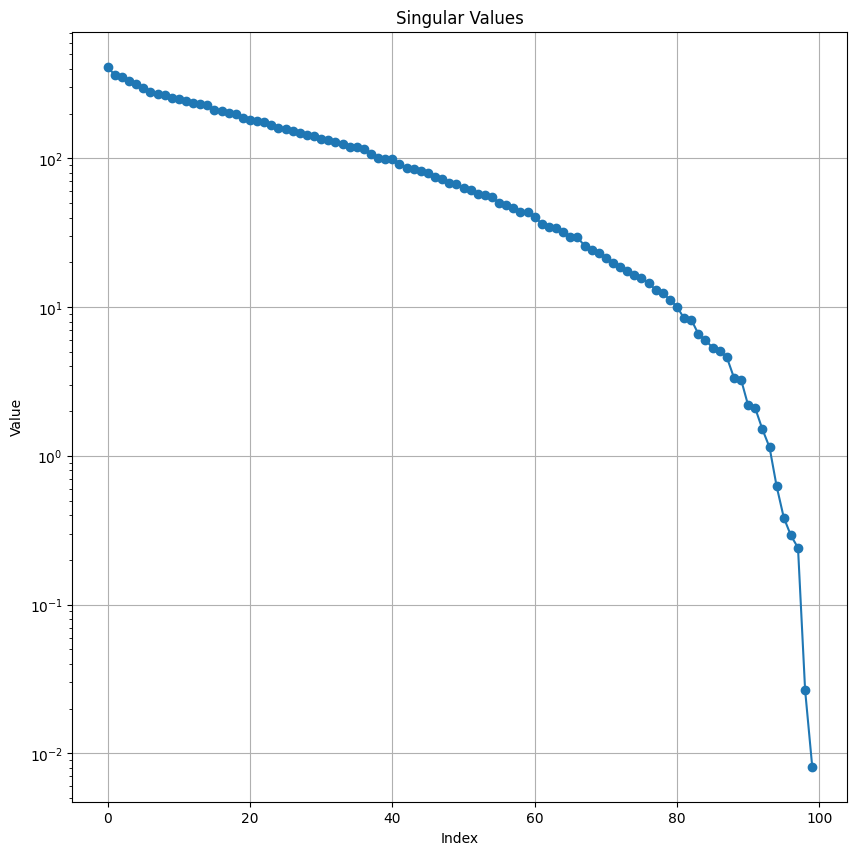

In [90]:
import matplotlib.pyplot as plt
# Plotting the singular values
plt.figure(figsize=(10, 10))
plt.plot(S, marker='o')
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.yscale('log')
# Log scale to see the drop off graph clearly
plt.grid(True)
plt.show()

In [91]:
k = 90
U_k = U[:, :k] # We select first k columns of U
S_diag = np.diag(S) #Then convert S into a diagonal matrix
S_k = S_diag[:k, :k] #We take the first k singular values (top-left k x k submatrix of S_diag)
VT_k = VT[:k, :] #Select the first k rows of VT
A_k = np.dot(U_k, np.dot(S_k, VT_k)) #rank-k approximation
print("Rank-k Approximation of AgAg^T:\n", A_k)

Rank-k Approximation of AgAg^T:
 [[ 96.46356888   7.20867467  -5.69942777 ...  -0.37869482   9.9824243
  -17.62167309]
 [  7.20867467 101.94941664   6.02694807 ...  -6.72487827 -16.47776993
    7.54618599]
 [ -5.69942777   6.02694807 102.30789119 ...   2.41946029   3.69396962
   26.11706742]
 ...
 [ -0.37869482  -6.72487827   2.41946029 ...  98.4403904    5.09240754
   25.72309192]
 [  9.9824243  -16.47776993   3.69396962 ...   5.09240754 129.5221493
    3.64474348]
 [-17.62167309   7.54618599  26.11706742 ...  25.72309192   3.64474348
  139.79045885]]


In [92]:
noise_mean = 0  #mean of the Gaussian noise
noise_std_dev = 0.1  #std deviation of the Gaussian noise
rows, columns = Ag.shape #Shape of Ag
noise = np.random.normal(noise_mean, noise_std_dev, (rows, columns))
#generating Gaussian noise with the same shape
Ag_noisy = Ag + noise #adding the noise
print("Rank-k Approximation of AgAg^T with Gaussian Noise:\n", Ag_noisy)

Rank-k Approximation of AgAg^T with Gaussian Noise:
 [[ 0.60265929 -1.21182911 -0.16707369 ...  0.76632485  0.49835473
  -1.33055716]
 [-1.30752245 -1.30825961  2.41069    ... -1.60468084  0.78038112
   1.28548129]
 [ 0.66296687 -0.02756689  1.12253241 ...  0.91887293  0.26123301
   1.87842282]
 ...
 [-1.13841427 -1.13480497 -0.76175812 ...  1.26319834  0.03402324
   1.16862739]
 [ 0.29948277  0.63323776 -0.74093803 ... -1.33402742 -1.13002949
   0.90528726]
 [-0.79111045  0.41522262  0.38151511 ...  0.45941497 -1.32527568
   1.49754432]]


In [93]:
Un, Sn, VTn = np.linalg.svd(np.dot(Ag_noisy.T,Ag_noisy))
print("Un:\n", Un)
print("Singular Values:", Sn)
print("VTn:\n", VTn)

Un:
 [[-0.03490389  0.08930457 -0.03487785 ...  0.04423148  0.01769885
   0.06203142]
 [ 0.18703089  0.07240449 -0.03921781 ...  0.06364612 -0.14104486
  -0.05989358]
 [ 0.20590554  0.08226399  0.10593157 ...  0.05595877  0.1456248
   0.16023607]
 ...
 [ 0.07332199 -0.05024568 -0.02678807 ...  0.15186454 -0.00055212
  -0.09698875]
 [-0.13621877 -0.17730703  0.0278403  ...  0.02138772  0.04004366
   0.06780656]
 [ 0.35924844 -0.14653793 -0.08895575 ...  0.05494813 -0.1100655
  -0.15710777]]
Singular Values: [4.16631270e+02 3.65549632e+02 3.57742345e+02 3.31867685e+02
 3.21413589e+02 3.04677385e+02 2.84530293e+02 2.77568797e+02
 2.72774410e+02 2.62268552e+02 2.57163092e+02 2.48798269e+02
 2.41127014e+02 2.32871554e+02 2.25674844e+02 2.10162284e+02
 2.07528786e+02 2.06392243e+02 1.97109626e+02 1.94841929e+02
 1.83237311e+02 1.82299027e+02 1.72708632e+02 1.64190190e+02
 1.59821880e+02 1.57784479e+02 1.54752129e+02 1.48377802e+02
 1.45086968e+02 1.42078735e+02 1.39799758e+02 1.33109244e+02


In [94]:
k = 90
U_nk = Un[:, :k]
S_ndiag = np.diag(Sn)
S_nk = S_diag[:k, :k]
VT_nk = VTn[:k, :]
A_nk = np.dot(U_nk, np.dot(S_nk, VT_nk))
print("Rank-k Approximation of Ag_noisy^T:\n", A_nk)

Rank-k Approximation of Ag_noisy^T:
 [[ 93.00948916   6.41091956  -4.22037618 ...  -2.04720868  10.40415344
  -16.3626151 ]
 [  6.41091956 103.4268676    5.33444352 ...  -6.76194195 -14.46554353
    7.55004873]
 [ -4.22037618   5.33444352 103.7375558  ...   1.96738003   3.10541542
   25.43248377]
 ...
 [ -2.04720868  -6.76194195   1.96738003 ...  98.83712129   2.46865823
   24.77019525]
 [ 10.40415344 -14.46554353   3.10541542 ...   2.46865823 130.45930671
    2.237832  ]
 [-16.3626151    7.55004873  25.43248377 ...  24.77019525   2.237832
  139.15496357]]


In [95]:
mse = np.mean((A_nk - A_k) ** 2)
print("MSE", mse)

MSE 2.0306372278941383
